In [1]:
import cmath, random, numpy
import functools
import  matplotlib.pyplot as plt
import sys
import os
import math
from qutip import*
from sympy import*
#from sympsi import*
from scipy import optimize   

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
import math
from qutip import *
from qutip.ipynbtools import plot_animation
import numpy as np
import matplotlib.pyplot as plt
import qutip
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import display, Math, Latex

In [5]:
"""Define the operators for MZI - we will deal in Heisenberg """
T = Symbol('T')
def schwinger_rep(a,b):
    jx = 0.5*(tensor(a.dag(),b) + tensor(b.dag(),a))
    jz = 0.5*(tensor(a.dag()*a, qeye(N_dim))-tensor(qeye(N_dim), b.dag()*b))
    return jx, jz   
def J_z(T,jx,jz):
    return -math.sin(T)*jx + math.cos(T)*jz
def derive_Jz(T,jx,jz):
    return -math.cos(T)*jx- math.sin(T)*jz
def J_z_square(phi,jx,jz):
    return math.sin(phi)*math.sin(phi)*jx*jx + math.cos(phi)*math.cos(phi)*jz*jz - math.sin(phi)*math.cos(phi)*(jx*jz+jz*jx)
def BS_operator_filtering(a1, a2, k):
    theta_k = np.arctan(1/np.sqrt(k))
    T = np.sin(theta_k)*np.sin(theta_k)
    R = np.cos(theta_k)*np.cos(theta_k)
    print('I am filtering', k, 'and:', theta_k*180/math.pi)
    print('BS T is : ', T, 'and : ', R)
    b = theta_k*(tensor(a1,a2.dag()) - tensor(a1.dag(),a2))
    return b.expm()
def coherent_state_PDF(n, alpha):
    mean_photon = abs(alpha)*abs(alpha)
    prob = math.exp(-mean_photon)*pow(mean_photon, n)/math.factorial(n)
    return prob, mean_photon
def fid_calc(psi_1, psi_2):
    fid = fidelity(psi_1, psi_2)
    return fid    
def var_square_jz(j_z, rho):
    return (j_z*j_z*rho).tr() - ((j_z*rho).tr())*((j_z*rho).tr())
def var_square_jx(j_x,rho):
    return (j_x*j_x*rho).tr() - (j_x*rho).tr()*((j_x*rho).tr())
def cov_jx_jz(j_x,j_z,rho):
    return  0.5*((j_x*j_z+j_x*j_z)*rho).tr() - (j_x*rho).tr()*(j_z*rho).tr()
def delta_jz_square(T,j_x,j_z,rho_in):
    del_jz = math.cos(T)*math.cos(T)*var_square_jz(j_z,rho_in)+ math.sin(T)*math.sin(T)*var_square_jx(j_x,rho_in)
    -math.sin(2*T)*cov_jx_jz(j_x,j_z,rho_in)
    return del_jz


TypeError: can't convert expression to float

In [17]:
a,b, c = symbols('a b c')
d = sin(a)*cos(b)


sin(a)*cos(b)

In [4]:
"""Great so far, lets do the filtering now. Lets define operators now"""

xvec = np.arange(-40.,40.)*5./40
X,Y = np.meshgrid(xvec, xvec)  ##Some plotting params
N_dim = 60##Dimenstion of the Hilbert spac

a1 = destroy(N_dim) ##This is for single-photon field
a2 = destroy(N_dim) ##for coherent field
Fock_state = fock(N_dim, 1)
#amp =0.707*(1+1j) ## Coherent state
amp = 4; #*(2+2j)
coherent_state_1 = coherent(N = N_dim,alpha = amp)
coherent_state_2 = coherent(N = N_dim, alpha = 2*amp)
CPADED =(tensor(create(N_dim), qeye(N_dim))*tensor(coherent_state_1, coherent_state_2)
                + tensor(qeye(N_dim), create(N_dim))*tensor(coherent_state_1, coherent_state_2))
cat_state  = 0.707*(coherent(N = N_dim, alpha = -amp))
Wigner_Fock_state = wigner(Fock_state,xvec,xvec)
CPADED
ket2dm(CPADED).tr()

39.42243611931998

In [76]:
T = 90*math.pi/180
j_x, j_z = schwinger_rep(a1,a2)
j_z_out = J_z(T,j_x,j_z)
delta_jz = derive_Jz(T,j_x,j_z)
j_z_out_square = J_z_square(T,j_x,j_z)

In [77]:
Exp_photon_number_diff = ((ket2dm(CPADED)/ket2dm(CPADED).tr())*j_z).tr()
print(Exp_photon_number_diff)

(-19.162620935368+0j)


In [84]:
"""Same for Fock states input"""

Rho_input_MZI_fock = ket2dm(CPADED)/ket2dm(CPADED).tr()
Rho_input_MZI_fock.tr()
#tensor(ket2dm(Fock_state_i),ket2dm(Fock_state_j))
J_z_out_fock = abs((Rho_input_MZI_fock*j_z_out).tr())
print("The expectation value is J_z = ")
print(J_z_out_fock)   
derive_J_z_out_fock = (Rho_input_MZI_fock*delta_jz).tr()
j_z_2_out_fock = (Rho_input_MZI_fock*j_z_out_square).tr()
#STDVD = math.sqrt(abs((j_z_2_out_fock- J_z_out_fock*J_z_out_fock)))
STDVD = (delta_jz_square(T,j_x,j_z,Rho_input_MZI_fock))
print("The expectation value is STDVD = ", STDVD)
#Exp_j_z_2_out = simplify(J_x_2_exp_in + .Exp_Cov_Jx_Jy + J_z_2_exp_in)
delta_phi_fock = STDVD/derive_J_z_out_fock
print("The expectation value is delta_phi = ", abs(delta_phi_fock))

The expectation value is J_z = 
27.591371837276952
The expectation value is STDVD =  (153.2895951940389+0j)
The expectation value is delta_phi =  68.86029053175785


In [85]:
Exp_photon_number_diff = ((ket2dm(CPADED)/ket2dm(CPADED).tr())*j_x).tr()
print(Exp_photon_number_diff)

(19.975816897474516+0j)


In [86]:
2*amp*amp*(2*amp*amp + 3)//ket2dm(CPADED).tr()

28.0

In [87]:
1/(Rho_input_MZI_fock*tensor(num(N_dim), num(N_dim))).tr()

(0.0011219465394845087+0j)

In [88]:
(Rho_input_MZI_fock*tensor(num(N_dim), num(N_dim))).tr()

(891.3080657652918+0j)

The expectation value is J_z = 
19.162620935368
The expectation value is STDVD =  (7.193752115945927+0j)
The expectation value is delta_phi =  0.360123050429813
The expectation value is J_z = 
27.162678594917097
The expectation value is STDVD =  (242.08078672335782+0j)
The expectation value is delta_phi =  45.40311936333205
The expectation value is J_z = 
10.189494821407378
The expectation value is STDVD =  (281.4728285351425+0j)
The expectation value is delta_phi =  10.936337163951853
The expectation value is J_z = 
16.151863499638697
The expectation value is STDVD =  (13.800046757516688+0j)
The expectation value is delta_phi =  0.6138773133400918
The expectation value is J_z = 
27.643273007254482
The expectation value is STDVD =  (197.19036767879714+0j)
The expectation value is delta_phi =  136.43993396128482
The expectation value is J_z = 
13.719584795482914
The expectation value is STDVD =  (312.22854564691073+0j)
The expectation value is delta_phi =  12.986857282658018
The expecta

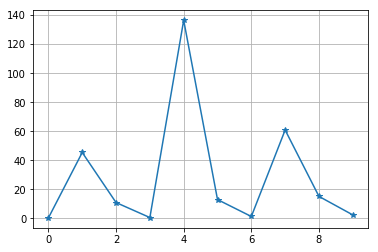

In [89]:
Delta = []
for T in range(10):
    j_z_out = J_z(T,j_x,j_z)
    delta_jz = derive_Jz(T,j_x,j_z)
    j_z_out_square = J_z_square(T,j_x,j_z)
    Rho_input_MZI_fock = ket2dm(CPADED)/ket2dm(CPADED).tr()
    Rho_input_MZI_fock.tr()
#tensor(ket2dm(Fock_state_i),ket2dm(Fock_state_j))
    J_z_out_fock = abs((Rho_input_MZI_fock*j_z_out).tr())
    print("The expectation value is J_z = ")
    print(J_z_out_fock)   
    derive_J_z_out_fock = (Rho_input_MZI_fock*delta_jz).tr()
    j_z_2_out_fock = (Rho_input_MZI_fock*j_z_out_square).tr()
#STDVD = math.sqrt(abs((j_z_2_out_fock- J_z_out_fock*J_z_out_fock)))
    STDVD = (delta_jz_square(T,j_x,j_z,Rho_input_MZI_fock))
    print("The expectation value is STDVD = ", STDVD)
#Exp_j_z_2_out = simplify(J_x_2_exp_in + .Exp_Cov_Jx_Jy + J_z_2_exp_in)
    delta_phi_fock = STDVD/derive_J_z_out_fock
    print("The expectation value is delta_phi = ", abs(delta_phi_fock))
    Delta.append(abs(delta_phi_fock))
plt.plot(Delta,'*-')
plt.grid()

In [90]:
Rho_input_MZI = ket2dm(tensor(coherent_state_1, fock(N_dim,0)))
#tensor(ket2dm(Fock_state_i),ket2dm(Fock_state_j))
J_z_out_fock = abs((Rho_input_MZI*j_z_out).tr())
print("The expectation value is J_z = ")
print(J_z_out_fock)   
derive_J_z_out_fock = (Rho_input_MZI*delta_jz).tr()
j_z_2_out_fock = (Rho_input_MZI*j_z_out_square).tr()
#STDVD = math.sqrt(abs((j_z_2_out_fock- J_z_out_fock*J_z_out_fock)))
STDVD = (delta_jz_square(T,j_x,j_z,Rho_input_MZI))
print("The expectation value is STDVD = ", STDVD)
#Exp_j_z_2_out = simplify(J_x_2_exp_in + .Exp_Cov_Jx_Jy + J_z_2_exp_in)
delta_phi_fock = STDVD/derive_J_z_out_fock
print("The expectation value is delta_phi = ", abs(delta_phi_fock))

The expectation value is J_z = 
7.2890420950578445
The expectation value is STDVD =  (3.3206334163059985+0j)
The expectation value is delta_phi =  1.007184079102569


The expectation value is J_z = 
21.374454425952912
The expectation value is STDVD =  (9.542150561453752+0j)
The expectation value is delta_phi =  5.0190095724710755
The expectation value is J_z = 
21.374454425952912
The expectation value is STDVD =  (467.2710218526985+0j)
The expectation value is delta_phi =  245.77664296042465
The expectation value is J_z = 
21.374454425952912
The expectation value is STDVD =  (544.0350495756521+0j)
The expectation value is delta_phi =  286.1532213304312
The expectation value is J_z = 
21.374454425952912
The expectation value is STDVD =  (22.415963689358783+0j)
The expectation value is delta_phi =  11.790417223925612
The expectation value is J_z = 
21.374454425952912
The expectation value is STDVD =  (379.7922009147914+0j)
The expectation value is delta_phi =  199.76426484417033
The expectation value is J_z = 
21.374454425952912
The expectation value is STDVD =  (603.9693056441148+0j)
The expectation value is delta_phi =  317.67762486915694
The expect

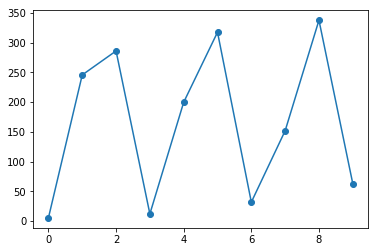

In [91]:
Delta_1 = []
for T in range(10):
    Rho_input_MZI = ket2dm(tensor(coherent_state_1, coherent_state_2))
#tensor(ket2dm(Fock_state_i),ket2dm(Fock_state_j))
    J_z_out_fock = abs((Rho_input_MZI*j_z_out).tr())
    print("The expectation value is J_z = ")
    print(J_z_out_fock)   
    derive_J_z_out_fock = (Rho_input_MZI*delta_jz).tr()
    j_z_2_out_fock = (Rho_input_MZI*j_z_out_square).tr()
#STDVD = math.sqrt(abs((j_z_2_out_fock- J_z_out_fock*J_z_out_fock)))
    STDVD = (delta_jz_square(T,j_x,j_z,Rho_input_MZI))
    print("The expectation value is STDVD = ", STDVD)
    #Exp_j_z_2_out = simplify(J_x_2_exp_in + .Exp_Cov_Jx_Jy + J_z_2_exp_in)
    delta_phi_fock = STDVD/derive_J_z_out_fock
    print("The expectation value is delta_phi = ", abs(delta_phi_fock))
    Delta_1.append(abs(delta_phi_fock))
plt.plot(Delta_1,'o-')

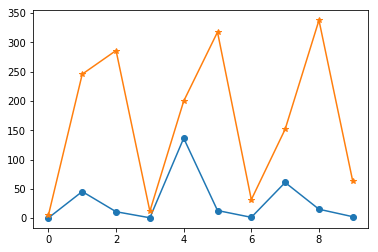

In [92]:
plt.plot(Delta, 'o-', Delta_1, '-*')

In [42]:
var_square_jx(j_z,Rho_input_MZI_fock)

(13.012877263774193+0j)

In [ ]:
J_z_out_fock*J_z_out_fock

In [ ]:
math.sin(20)

In [ ]:
math.cos(20)

In [ ]:
0.72*0.90*0.97*0.93

In [94]:
1/math.sqrt(32)

0.17677669529663687

In [95]:
range(10)

range(0, 10)

In [96]:
print(range(10))

range(0, 10)


In [98]:
math.sqrt(5)

2.23606797749979